# Classification of high dimensional data with and without PCA, Handling imbalanced data.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# load and read data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covtype.csv')

In [93]:
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [94]:
data.shape

(581012, 55)

In [95]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## Class distribution

In [8]:
data["Cover_Type"].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

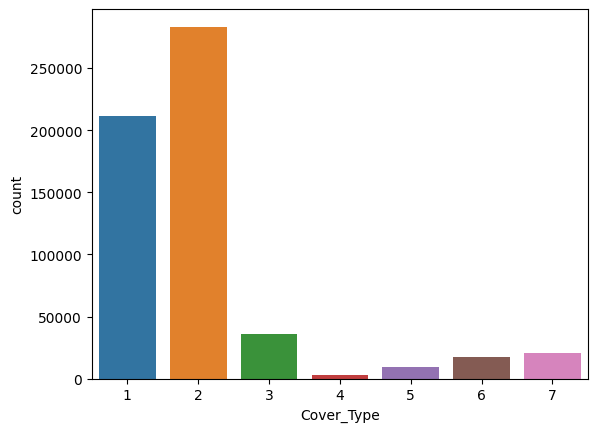

In [9]:
# visualize the results

sns.countplot(data=data,x='Cover_Type')
plt.show()

## handle imbalanced data

### Under-Sampling for the majority class

In [96]:
class_1 = data[data['Cover_Type'] == 1]
class_2 = data[data['Cover_Type'] == 2]
class_3 = data[data['Cover_Type'] == 3]
class_4 = data[data['Cover_Type'] == 4]
class_5 = data[data['Cover_Type'] == 5]
class_6 = data[data['Cover_Type'] == 6]
class_7 = data[data['Cover_Type'] == 7]

In [97]:
class_1_under = class_1.sample(17367)
class_2_under = class_2.sample(17367)
class_3_under = class_3.sample(17367)
class_7_under = class_7.sample(17367)

In [98]:
df_under = pd.concat([class_1_under, class_2_under, class_3_under, class_7_under,class_4,class_5,class_6], axis=0)

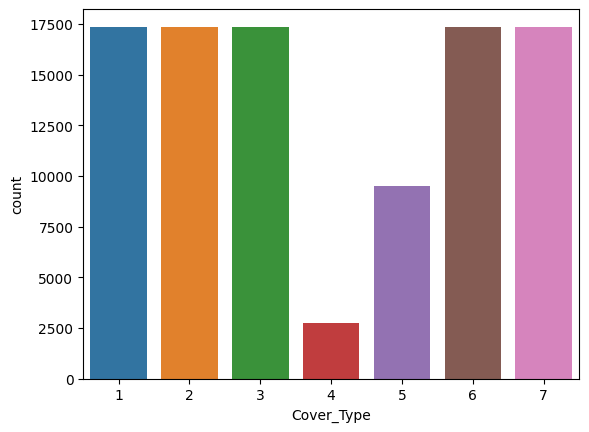

In [99]:
sns.countplot(data=df_under,x='Cover_Type')
plt.show()

In [100]:
df_under["Cover_Type"].value_counts()

1    17367
2    17367
3    17367
7    17367
6    17367
5     9493
4     2747
Name: Cover_Type, dtype: int64

### Over-Sampling for the Minority classes using Synthetic Minority Oversampling Technique (SMOTE)

In [101]:
X = df_under.drop(['Cover_Type'], axis=1)
y = df_under['Cover_Type']

In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [103]:
classes = y_smote.unique()
classes

array([1, 2, 3, 7, 4, 5, 6])

In [104]:
y_smote.value_counts()

1    17367
2    17367
3    17367
7    17367
4    17367
5    17367
6    17367
Name: Cover_Type, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

# train and test data split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,test_size=0.2)

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [107]:
X_train.shape  , y_train.shape , X_test.shape, y_test.shape

((59445, 54), (59445,), (19815, 54), (19815,))

In [108]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_test = scaler.fit_transform(X_test)

In [33]:
X_test

array([[0.65691221, 0.31666667, 0.11320755, ..., 0.        , 0.        ,
        0.        ],
       [0.59939455, 0.91111111, 0.26415094, ..., 0.        , 0.        ,
        0.        ],
       [0.77749748, 0.28888889, 0.22641509, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.76286579, 0.14444444, 0.05660377, ..., 1.        , 0.        ,
        0.        ],
       [0.69374369, 0.34166667, 0.24528302, ..., 0.        , 0.        ,
        0.        ],
       [0.78002018, 0.23333333, 0.22641509, ..., 0.        , 0.        ,
        1.        ]])

In [109]:
# the shape of train and test sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59445, 54)
(59445,)
(19815, 54)
(19815,)


In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
import time
from sklearn.svm import SVC

## Ruing the KNN model without *PCA*

In [111]:
start2 = time.time()

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

end2 = time.time()
Knn_time = end2-start2

In [113]:
print("KNN Time: {:0.2f} minute".format(Knn_time/60.0))

KNN Time: 0.00 minute


In [114]:
# make a prediction
y_predict = knn_model.predict(X_test)

In [115]:
#Print out the expected and predicted value for the math score
dm = pd.DataFrame()
dm['Expected'] = y_test[0:9]
dm['Predicted'] = y_predict[0:9]
dm

,Expected,Predicted
41671,1,1
320349,1,1
470404,7,7
277885,6,6
230615,3,3
5144,4,3
355629,1,1
109292,2,1
236863,3,6


In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
knn_model_acc = accuracy_score(y_test, knn_model.predict(X_test))
knn_model_pre = precision_score(y_test, knn_model.predict(X_test), average='weighted')
knn_model_re = recall_score(y_test, knn_model.predict(X_test), average='weighted')

In [117]:
knn_model_train = knn_model.score(X_train, y_train)
knn_model_test = knn_model.score(X_test, y_test)

In [118]:
print('Accuracy score:' ,knn_model_acc,
                   'Precision score:', knn_model_pre,\
                   'Recall score:', knn_model_re,\
                   'Train Score:', knn_model_train,\
                   'Test Score:', knn_model_test)

Accuracy score: 0.8693414080242241 Precision score: 0.8679547577412345 Recall score: 0.8693414080242241 Train Score: 0.938178147867777 Test Score: 0.8693414080242241


In [119]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = y_test.unique()
mcm = multilabel_confusion_matrix(y_test, y_predict, labels = y_unique)
mcm

array([[[15767,   568],
        [  686,  2794]],

       [[16202,   190],
        [   57,  3366]],

       [[15833,   501],
        [  310,  3171]],

       [[15955,   402],
        [  462,  2996]],

       [[19150,    83],
        [  120,   462]],

       [[15754,   564],
        [  875,  2622]],

       [[17640,   281],
        [   79,  1815]]])

Text(0.5, 1.0, 'Confusion Matrix')

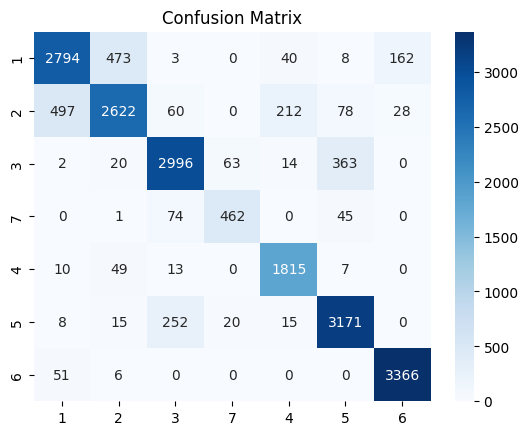

In [120]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test,
                                            y_pred=y_predict)
mc_df = pd.DataFrame(confusion_matrix,
                     index=classes,
                     columns=classes)
sns.heatmap(mc_df, annot =True, fmt="d",cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")

## Ruing the KNN model with PCA

In [59]:
pca = PCA(n_components=2)
x_train_pca =pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
# make a prediction
y_predict = knn_model.predict(x_test_pca)

In [86]:
#Print out the expected and predicted value for the math score
dm = pd.DataFrame()
dm['Expected'] = y_test[0:9]
dm['Predicted'] = y_predict[0:9]
dm

,Expected,Predicted
64044,1,1
309238,1,1
371688,7,1
277885,6,6
363918,3,3
5144,4,4
531530,1,6
117636,2,2
574222,3,2


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
knn_model_acc = accuracy_score(y_test, knn_model.predict(x_test_pca))
knn_model_pre = precision_score(y_test, knn_model.predict(x_test_pca), average='weighted')
knn_model_re = recall_score(y_test, knn_model.predict(x_test_pca), average='weighted')

In [89]:
knn_model_train = knn_model.score(x_train_pca, y_train)
knn_model_test = knn_model.score(x_test_pca, y_test)

In [90]:
print('Accuracy score:' ,knn_model_acc,
                   'Precision score:', knn_model_pre,\
                   'Recall score:', knn_model_re,\
                   'Train Score:', knn_model_train,\
                   'Test Score:', knn_model_test)

Accuracy score: 0.5464547060307847 Precision score: 0.5516135128626427 Recall score: 0.5464547060307847 Train Score: 0.7587013205484061 Test Score: 0.5464547060307847


Text(0.5, 1.0, 'Confusion Matrix')

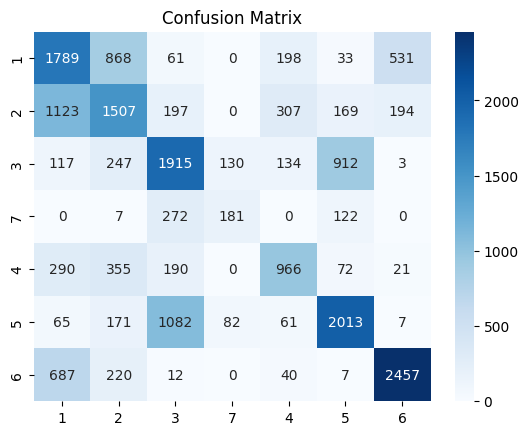

In [91]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test,
                                            y_pred=y_predict)
mc_df = pd.DataFrame(confusion_matrix,
                     index=classes,
                     columns=classes)
sns.heatmap(mc_df, annot =True, fmt="d",cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")

In [55]:
# Naive Bayes
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, X_test, y_test, display_labels=[0, 1 ], cmap=plt.cm.Blues)
plt.show()

ImportError: ignored

In [48]:
python3 -m pip show scikit-learn

SyntaxError: ignored

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C= 1,penalty='l2',max_iter=100)
lr.fit(x_train_pca,y_train)

LogisticRegression(C=1)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip uninstall scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.
